# Homework 2

Done by:
* Name: Deyan Milchev
* Specialty: Computer science
* Course: 3
* Group: 7
* Faculty number: 0MI0800126

## Description
Basketball team TeamBasket has a problem: athletes that has recently joined the team are soon leaving. The team needs players that play for a longer period of time, because they need time to get used to each other. This is why the HR team wants to use ML algorithms to try and predict which athletes are going to play for longer.

## Data description
In the data folder there is a CSV, file with all the information that we can use to solve the task. Here is a description of every columns:

* Name - name of the player. 
* GamesPlayed - number of games played with the team.
* MinutesPlayed - minutes spent in game with the team.
* PointsPerGame - avarage points scored by the player per game. 
* FieldGoalsMade - number of field goals made by the player.
* FieldGoalsAttempt - number of field goals attempts by the player.
* FieldGoalsPercent - percent of sucessfull field goal attempts. 
* 3PointMade - number of field goals that bring 3 points made by the player.
* 3PointAttempt - number of field goal attempts that bring 3 points made by the player. 
* 3PointPercent - percent of sucessfull field goal attempts that bring 3 points. 
* FreeThrowMade - number of sucessfull free throws. 
* FreeThrowAttempt - total number of free throw attempts. 
* FreeThrowPercent - percent of sucessfull free throws.
* OffensiveRebounds - number of continued atacks.
* DefensiveRebounds - number of stopped atacks. 
* Rebounds - number of tries for rebound - defensive and offensive.
* Assists - number of assists. 
* Steals - number of stollen balls. 
* Blocks - number of blocks. 
* Turnovers - number of counter-atacks, started by the player. 

## Requirments
* Use unsupervised learning. 
* Analyse the data.
* Check for missing values. Handle them accordingly.
* Check for outliers. Handle them accordingly.
* Check for correlations between the data. Visualize what you have found with pandas, matplotlib and seaborn. Show at least five plots. Show at least one dendogram.
* Perform dimensionality reduction. Reduce the features to two. 
* Compare at least 4 different clustering algorithms. 
* Check if a bigger number of clusters is, groups the data better.

Analyse the data, document everything and create a model that will predict if a player will be in the team for at least 5 years.

#### Note
First think I see about the data is that, columns FieldGoalPercent, 3PointPercent and FreeThrowPercent can be calculated by the other two columns that represent the sucessfull attempts and total attempts.

In [61]:
%reset -f

#### Imports

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_score

#### Load the data

In [63]:
df = pd.read_csv('data/basketball_performance.csv')

In [64]:
df.head()

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


#### Exploratory data analysis

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1340 non-null   int64  
 1   Name               1340 non-null   object 
 2   GamesPlayed        1340 non-null   int64  
 3   MinutesPlayed      1340 non-null   float64
 4   PointsPerGame      1340 non-null   float64
 5   FieldGoalsMade     1340 non-null   float64
 6   FieldGoalsAttempt  1340 non-null   float64
 7   FieldGoalPercent   1340 non-null   float64
 8   3PointMade         1340 non-null   float64
 9   3PointAttempt      1340 non-null   float64
 10  3PointPercent      1329 non-null   float64
 11  FreeThrowMade      1340 non-null   float64
 12  FreeThrowAttempt   1340 non-null   float64
 13  FreeThrowPercent   1340 non-null   float64
 14  OffensiveRebounds  1340 non-null   float64
 15  DefensiveRebounds  1340 non-null   float64
 16  Rebounds           1340 

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1340.0,669.500000,386.968991,0.0,334.750,669.50,1004.25,1339.0
GamesPlayed,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.00,82.0
MinutesPlayed,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.90,40.9
PointsPerGame,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.80,28.2
FieldGoalsMade,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.40,10.2
FieldGoalsAttempt,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.50,19.8
FieldGoalPercent,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.90,73.7
3PointMade,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.40,2.3
3PointAttempt,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.20,6.5
3PointPercent,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.50,100.0


In [67]:
df.isna().sum()

Unnamed: 0            0
Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
dtype: int64

The dataset if very good. We have only one feature with 11 missing values, but they aren't really missing as we can calculate these 11 values out of the 3PointsMade feature and 3PointsAttempt.

In [68]:
df[df['3PointPercent'].isna()]

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
338,338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
339,339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
340,340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,...,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4
358,358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,...,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5
386,386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,...,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2
397,397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,...,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4
507,507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,...,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1
509,509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,...,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9
510,510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,...,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8
521,521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,...,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7


In the end the 11 blocks of missing data turned out to be NaN, because they can't be calculated. 3PointMade and 3PointAttempts are zeros in these rows.

#### Let's check the distribution of the data

<Axes: xlabel='GamesPlayed', ylabel='Count'>

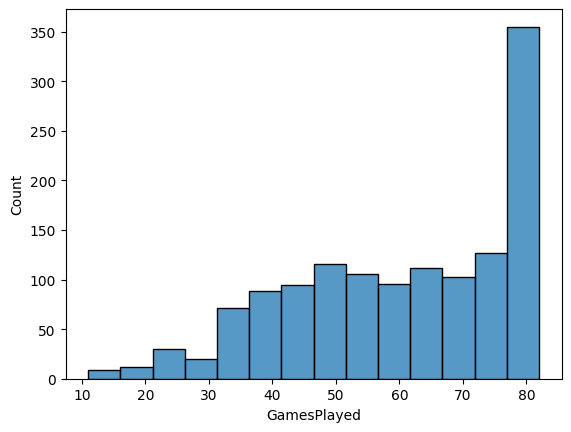

In [69]:
sns.histplot(df['GamesPlayed'])

<Axes: xlabel='MinutesPlayed', ylabel='Count'>

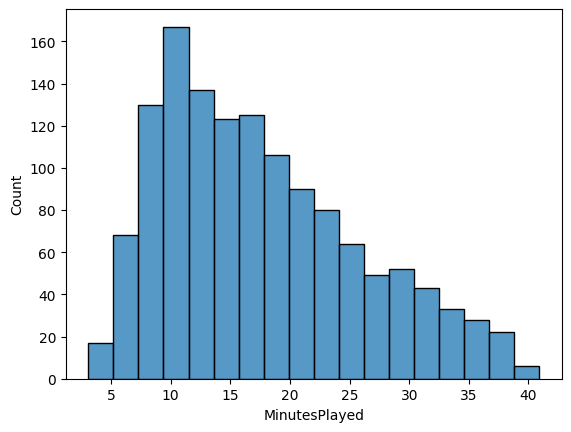

In [70]:
sns.histplot(df['MinutesPlayed'])

<Axes: xlabel='PointsPerGame', ylabel='Count'>

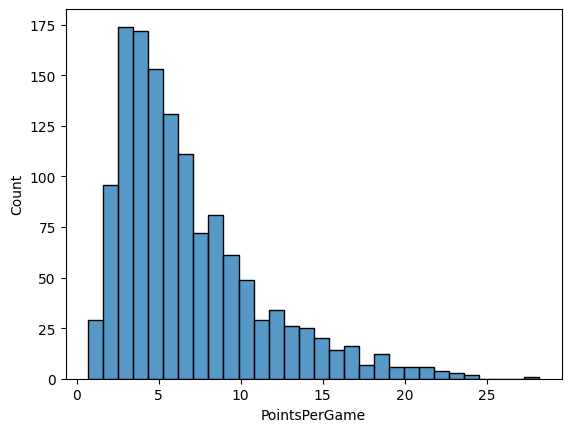

In [71]:
sns.histplot(df['PointsPerGame'])

<Axes: xlabel='FieldGoalsMade', ylabel='Count'>

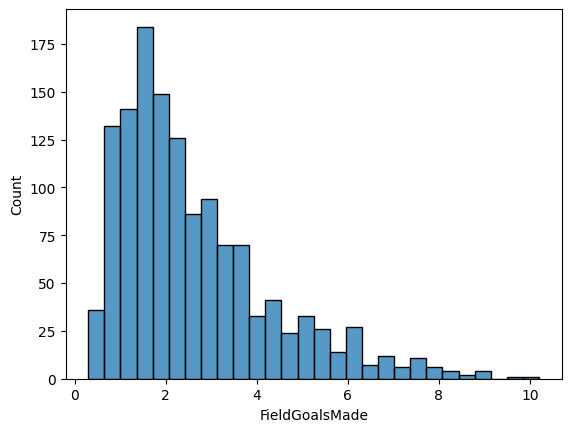

In [72]:
sns.histplot(df['FieldGoalsMade'])

<Axes: xlabel='3PointMade', ylabel='Count'>

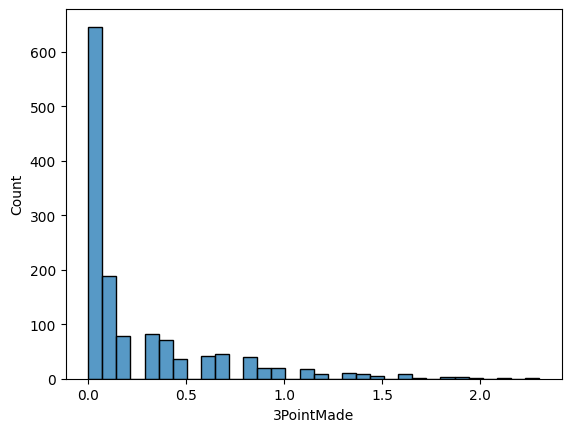

In [73]:
sns.histplot(df['3PointMade'])

<Axes: xlabel='FreeThrowMade', ylabel='Count'>

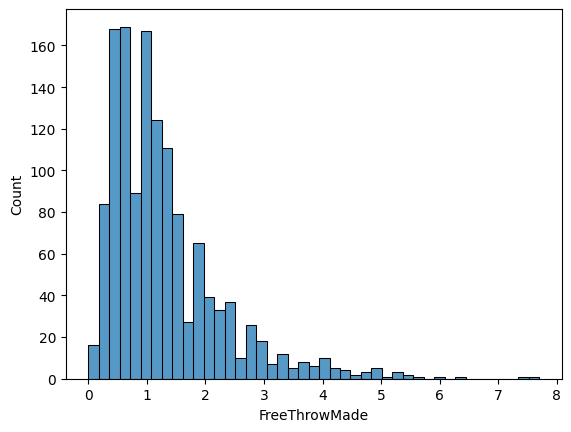

In [74]:
sns.histplot(df['FreeThrowMade'])

<Axes: xlabel='OffensiveRebounds', ylabel='Count'>

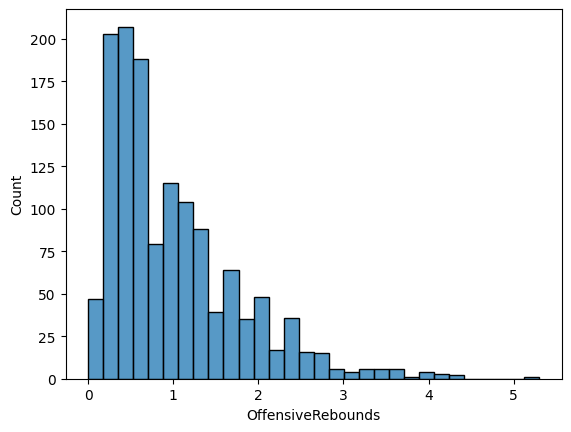

In [75]:
sns.histplot(df['OffensiveRebounds'])

<Axes: xlabel='DefensiveRebounds', ylabel='Count'>

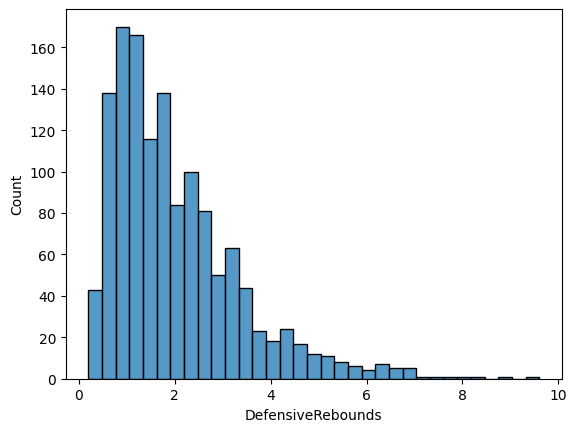

In [76]:
sns.histplot(df['DefensiveRebounds'])

<Axes: xlabel='Assists', ylabel='Count'>

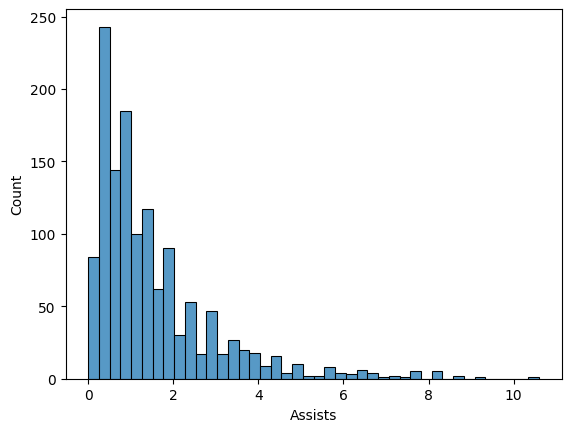

In [77]:
sns.histplot(df['Assists'])

<Axes: xlabel='Steals', ylabel='Count'>

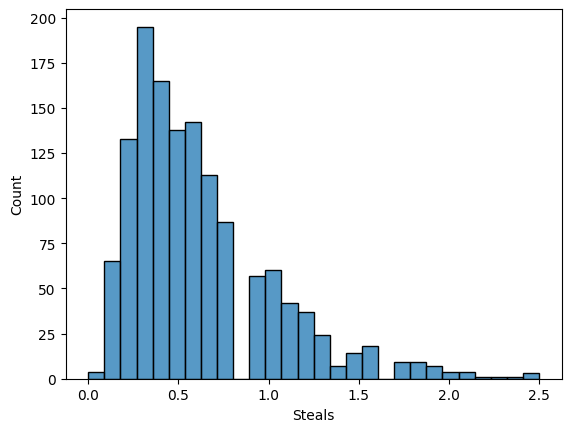

In [78]:
sns.histplot(df['Steals'])

<Axes: xlabel='Blocks', ylabel='Count'>

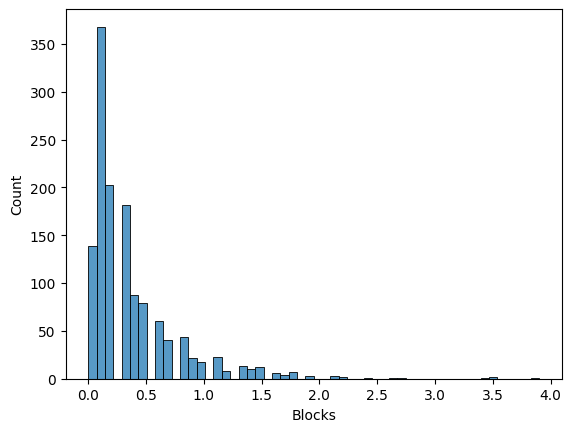

In [79]:
sns.histplot(df['Blocks'])

<Axes: xlabel='Turnovers', ylabel='Count'>

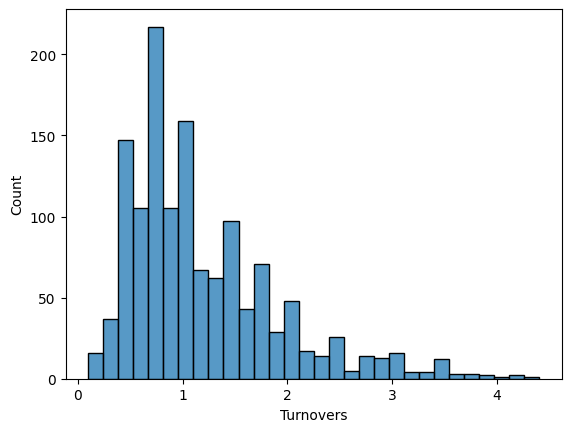

In [80]:
sns.histplot(df['Turnovers'])

All of the data is more or less normally distributed, with some exceptions. There are some features that have some suspicios 'outliers?', like Blocks or maybe assists? We can check if these are really outliers.

In [81]:
var = np.var(df['Blocks'])
mean = np.mean(df['Blocks'])
var, mean

(0.183945750723992, 0.3685820895522388)

In [82]:
from statistics import NormalDist
1 - NormalDist(mu=mean, sigma=var).cdf(2.5)

0.0

In [83]:
z_score = (2.5 - mean) / var
z_score # z_score >= 3 is considered high

11.587209283490997

As I have shown above, if the Blocks feature is  normally distributed, the chance of it having values over 2.5 is very, very low. Practically zero. The think is that it I am not sure if it is normally distributed as the domain are positive numbers and we can see the left tail of the data is cut off. I don't know what to do do be honest, but I will leave it like that.

#### Extract numeric data only

In [84]:
df_num = df.drop(columns=['Name'])

<Axes: >

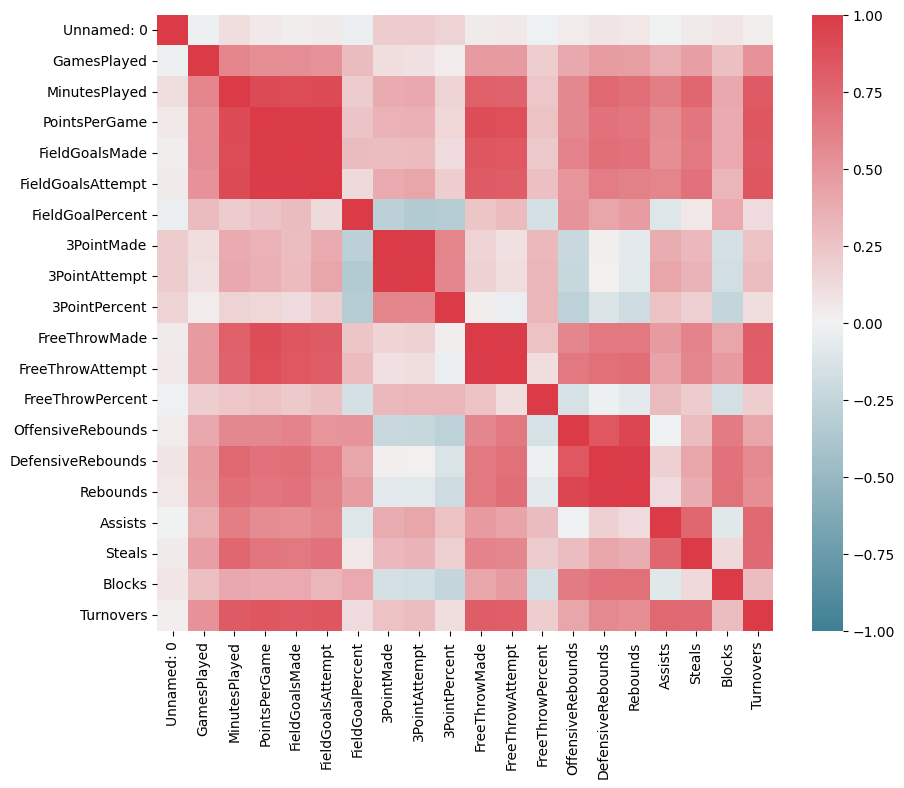

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_num.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

#### Analysis of the correlation matrix
* We can see that there is big correlation between games played, points per game, field goals made and field goal attempts, but this is totally normal as these features are connected by the basketball rules - you score a point when you make a field goal.
* There is correlation between offensive rebounds, deffensive rebounds and rebounds. While the first two being correlated with the last one is totally intuitive, having the first two correlated probably means something, but I don't have any basketball knowledge...
* There is negative correlation between rebounds and the 3 points features, this tells us that the  people that are going for rebounds aren't the ones that try to score 3 point field goals.
* There is negative correlation between the 3 points features and field goals percent. Scoring 3 points is very hard, so trying to do it lowers your field goals percent.
* Assists and steals are correlated.

<Axes: xlabel='MinutesPlayed', ylabel='PointsPerGame'>

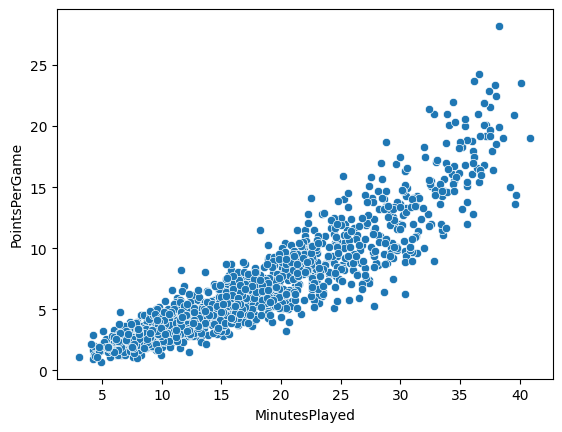

In [86]:
sns.scatterplot(x=df['MinutesPlayed'], y=df['PointsPerGame'])

There is obvious correlation between minutes played and points per game. There is a reason why some players play more than others... Not only the players that play more are getting better, but also coaches are choosing the players that are scoring more points.

<Axes: xlabel='FieldGoalsMade', ylabel='3PointMade'>

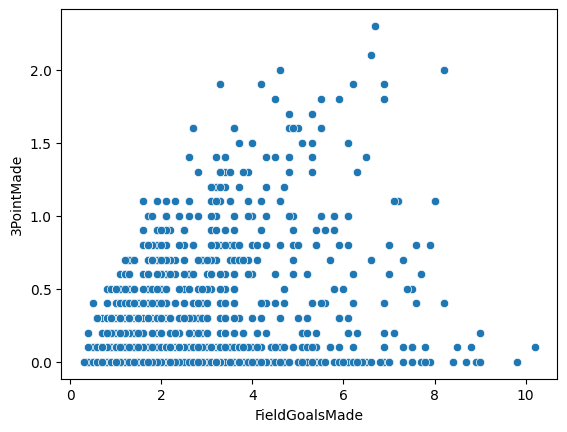

In [87]:
sns.scatterplot(data=df, x='FieldGoalsMade', y='3PointMade')

There is negative correlation between field goals made and 3 poimts made, probably because people that are trying to make 3 points are less likely to attack and score a field goal, or something else?

<Axes: xlabel='Assists', ylabel='Steals'>

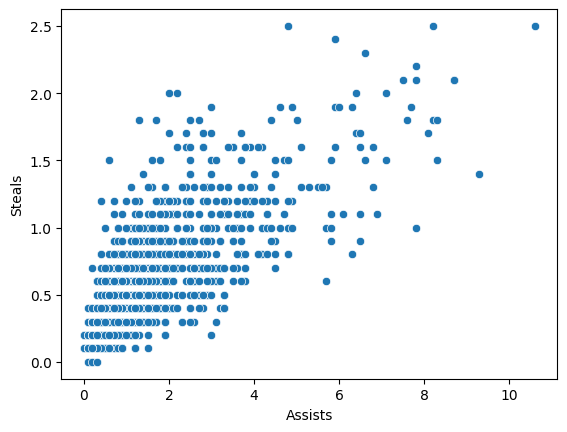

In [88]:
sns.scatterplot(data=df, x='Assists', y='Steals')

There is correlatiom between assists and steals. We can see that players that have made more steals are also more likely to have made more assists. I don't understand basketball and I don't know why this is the case.

<Axes: xlabel='FreeThrowPercent', ylabel='count'>

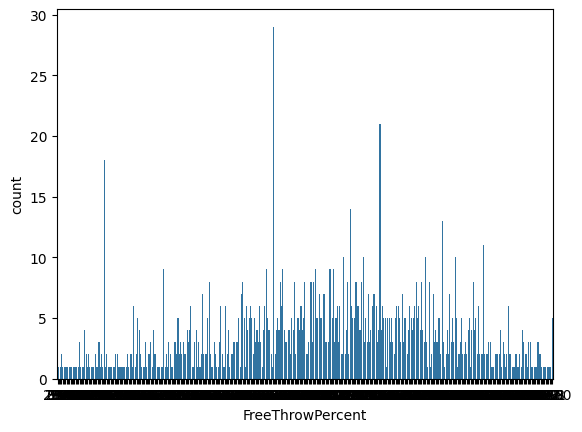

In [89]:
sns.countplot(data=df, x='FreeThrowPercent')

In [90]:
np.mean(df['FreeThrowPercent']), np.var(df['FreeThrowPercent'])

(70.30029850746268, 111.82071632880374)

I had a theory that free throw percent is pretty much the same to all players as I thought that all of them have mastered this skill, but this theory is debunked.

<Axes: xlabel='MinutesPlayed', ylabel='FieldGoalsAttempt'>

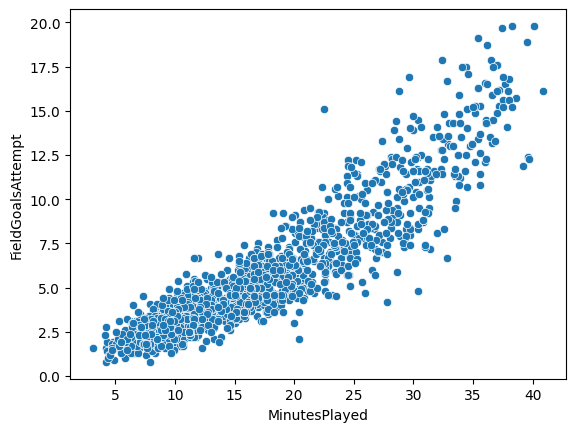

In [91]:
sns.scatterplot(data=df, x='MinutesPlayed', y='FieldGoalsAttempt')

Field goals attempt features is counted per game. This means that the correlation we see isn't just the more you play -> the more you try to score, but this means that players that are chosen to play more by their coaches are trying to score more frequently.

<Axes: xlabel='FreeThrowMade', ylabel='Turnovers'>

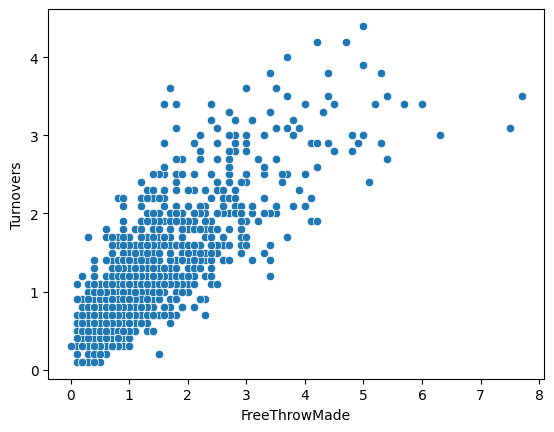

In [92]:
sns.scatterplot(data=df, x='FreeThrowMade', y='Turnovers')

There is correlation between turnovers and free throws made as we can see. I don't know why this is the case!

#### Dimensionality reduction

Let's drop the columns we don't need. We want to reduce the dimension of the data. Before applying PCA I think it is wise to remove the percent features, as they don't add anything to the data. Not sure if this a good practice or not, but sounds good.

In [93]:
X = df.drop(columns=['Unnamed: 0', 'Name', 'FieldGoalPercent', '3PointPercent', 'FreeThrowPercent'])

In [94]:
X.head()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,3PointMade,3PointAttempt,FreeThrowMade,FreeThrowAttempt,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,2.5,0.3,0.3,0.4,0.8


#### Scaling the data

In [95]:
scaler = StandardScaler()
scaler

StandardScaler()

In [96]:
scaler.fit(X)

StandardScaler()

In [97]:
X_reduced = pd.DataFrame(scaler.transform(X))
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.400901,1.177066,0.137401,-0.017294,0.477347,0.658041,1.244354,0.306333,0.361484,-0.398290,1.010852,0.517997,0.237640,-0.533458,0.073254,0.147338
1,-1.458281,1.116860,0.091486,-0.373816,0.226801,1.179494,1.903829,1.319630,1.193248,-0.655746,-0.018938,-0.308447,1.461613,1.175502,0.306415,0.562695
2,0.779563,-0.279912,-0.367659,-0.373816,-0.329969,0.397315,0.867511,-0.402975,-0.394665,-0.655746,-0.239607,-0.405676,-0.374347,-0.289321,-0.159906,-0.268019
3,-0.138527,-0.725434,-0.252873,-0.195555,-0.107261,-0.384863,-0.263016,-0.402975,-0.394665,-0.012104,-0.828059,-0.551519,-0.510344,-0.045184,-0.626228,-0.268019
4,-0.712333,-0.737475,-0.528360,-0.611497,-0.803224,-0.645589,-0.639859,0.002344,0.059025,-0.012104,-0.386720,-0.259833,-0.850337,-0.777595,0.073254,-0.544923


#### PCA

In [98]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [99]:
pca.fit(X_reduced)

PCA(n_components=2)

In [100]:
X_reduced= pd.DataFrame(pca.transform(X_reduced), columns = ['first', 'second'])

In [101]:
X_reduced.head()

,first,second
0,0.923246,0.711439
1,1.599217,2.406598
2,-0.934294,0.782342
3,-1.366790,0.043551
4,-1.736619,-1.108483


<Axes: xlabel='first', ylabel='second'>

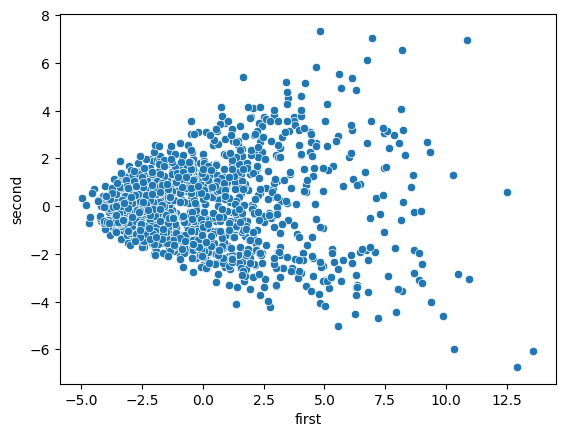

In [102]:
sns.scatterplot(data=X_reduced, x='first', y='second')

In [103]:
pca.explained_variance_ratio_

array([0.58682636, 0.18848586])

It is normal that most of the variance is explained by the first component!

In [104]:
np.sum(pca.explained_variance_ratio_)

0.7753122150804459

The sum of explained variance is considered to be an important metric of PCA, this shows is how much of the variance we are losing. Explained variance sum usually must be above 80% as this is considered the threshold, but let's say that we are close enough.

#### KNN

In [105]:
knn2 = KMeans(n_clusters=2)
knn2

KMeans(n_clusters=2)

In [106]:
knn2.fit(X_reduced)

KMeans(n_clusters=2)

In [107]:
predictions = knn2.predict(X_reduced)

<Axes: xlabel='first', ylabel='second'>

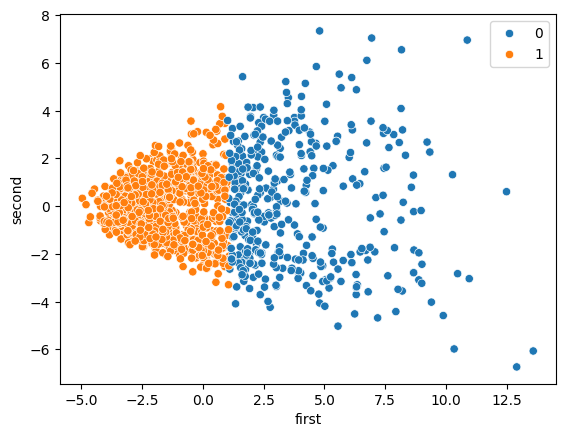

In [108]:
sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

In [109]:
knn2.inertia_

8245.120523112324

<Axes: >

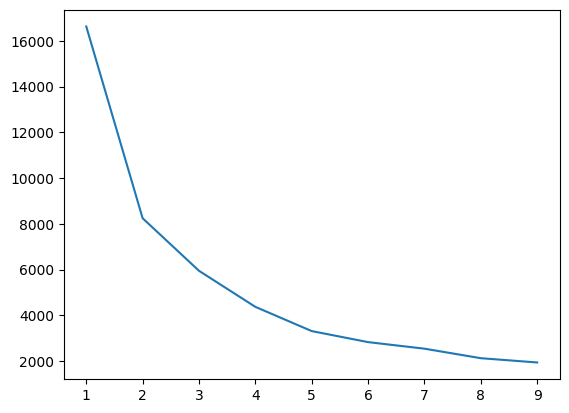

In [110]:
K = range(1, 10)
SSD = []

for k in K:
    SSD.append(KMeans(n_clusters=k).fit(X_reduced).inertia_)
    
sns.lineplot(x=K, y=SSD)

I am trying to use the elbow technique, but I can't see a definitive elbow. Probably k = 6?

In [111]:
knn6 = KMeans(n_clusters=6)
predictions = knn6.fit_predict(X_reduced)

<Axes: xlabel='first', ylabel='second'>

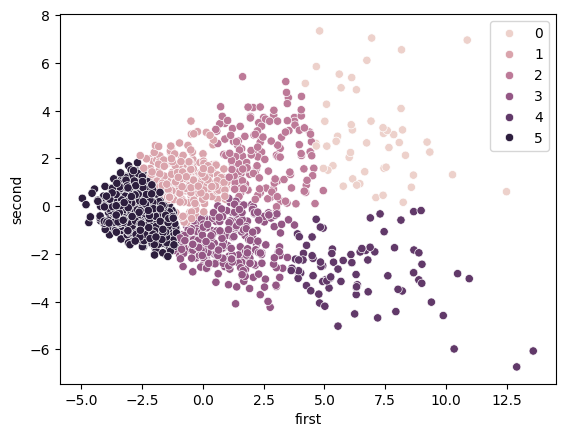

In [112]:
sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

<Axes: >

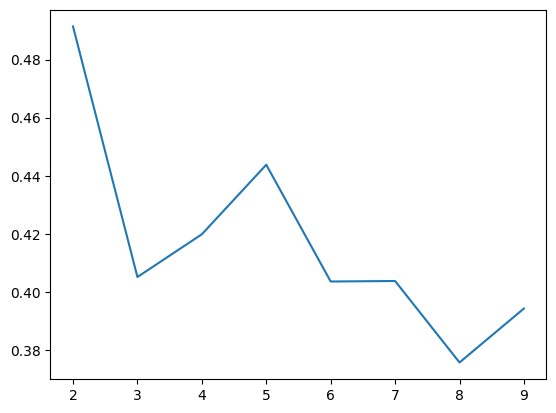

In [113]:
K = range(2, 10)
SS = []

for k in K:
    predictions = KMeans(n_clusters=k).fit_predict(X_reduced)
    SS.append(silhouette_score(X_reduced, predictions))
    
sns.lineplot(x=K, y=SS)

Silhoutte score metric, gives us a better plot, where we can easily see the elbow at k=3.

In [114]:
knn3 = KMeans(n_clusters=3)
predictions = knn3.fit_predict(X_reduced)

<Axes: xlabel='first', ylabel='second'>

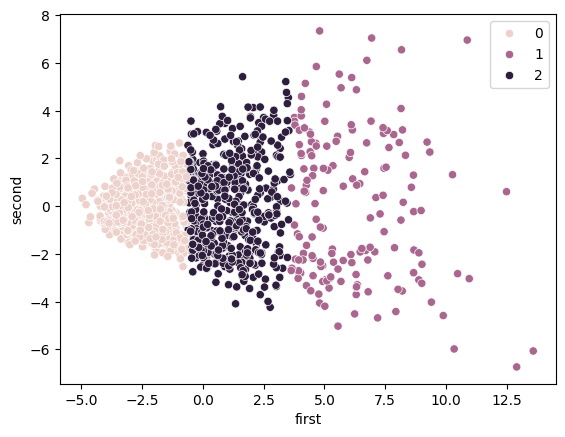

In [115]:
sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

Look's good! 

#### Aglomerative clustering

In [116]:
ac2 = AgglomerativeClustering(n_clusters=2)
predictions = ac2.fit_predict(X_reduced)

<Axes: xlabel='first', ylabel='second'>

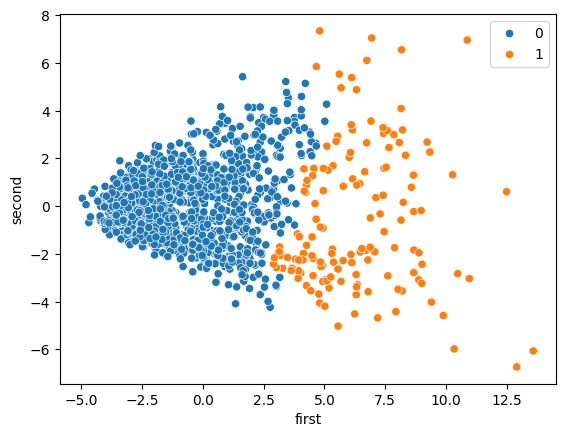

In [117]:
sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

This looks like a better model than kNN, at least of what I can see from this plot. There is a point at which the left (blue) cluster starts to get a little bit more diluted and this model is representing this line better than kNN.

<Axes: >

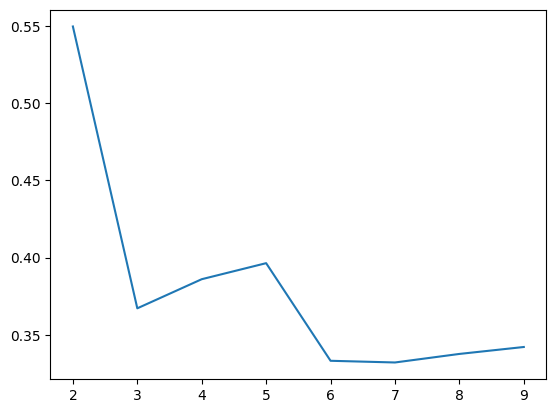

In [118]:
clusters = range(2, 10)
SS = []

for cluster in clusters:
    predictions = AgglomerativeClustering(n_clusters=cluster).fit_predict(X_reduced)
    SS.append(silhouette_score(X_reduced, predictions))
    
sns.lineplot(x=clusters, y=SS)

Again we can see the elbow at k=3

In [119]:
ac3= AgglomerativeClustering(n_clusters=3)
predictions = ac3.fit_predict(X_reduced)

<Axes: xlabel='first', ylabel='second'>

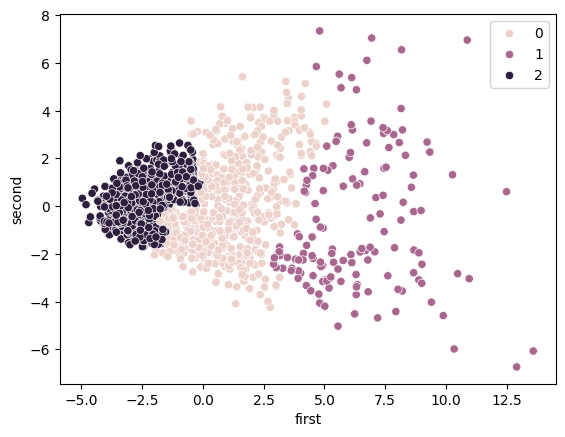

In [120]:
sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

Very different than the kNN algorithm. I don't know which is better in our case, but the silhouette score for the aglomerative algorithm is lower than kNN.

#### DBSCAN

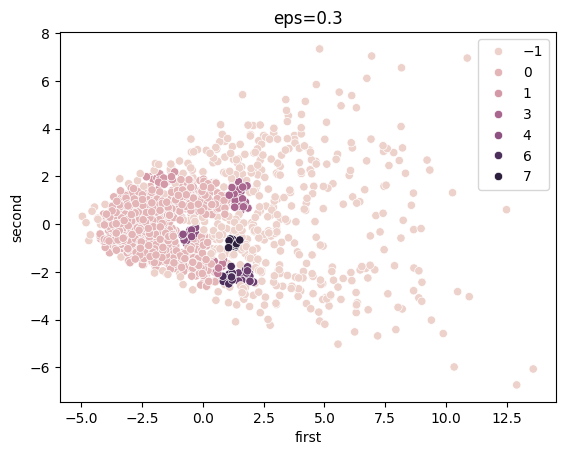

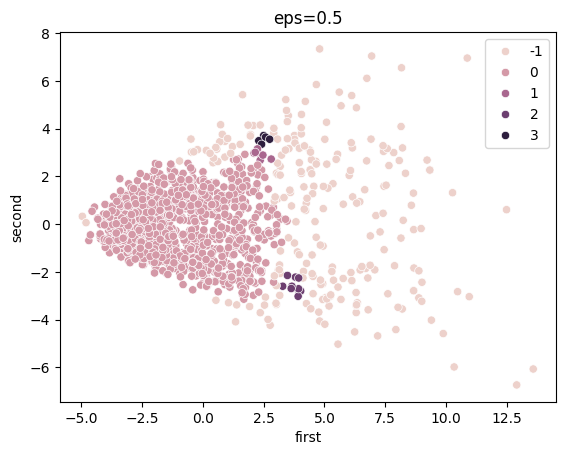

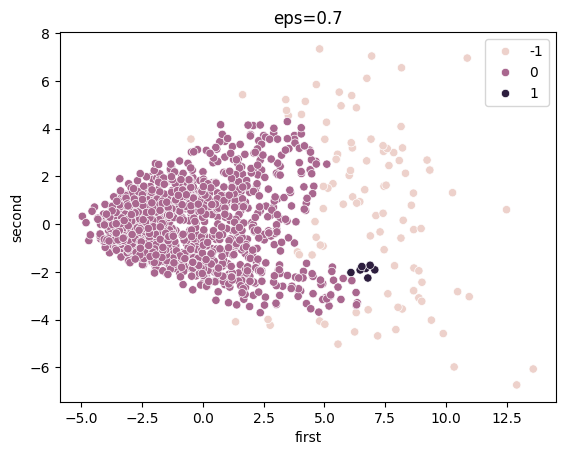

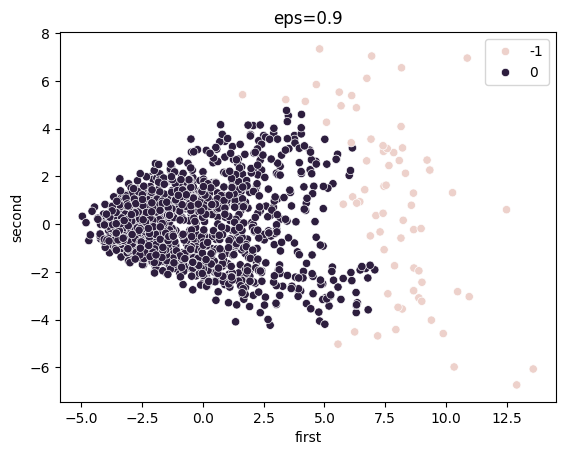

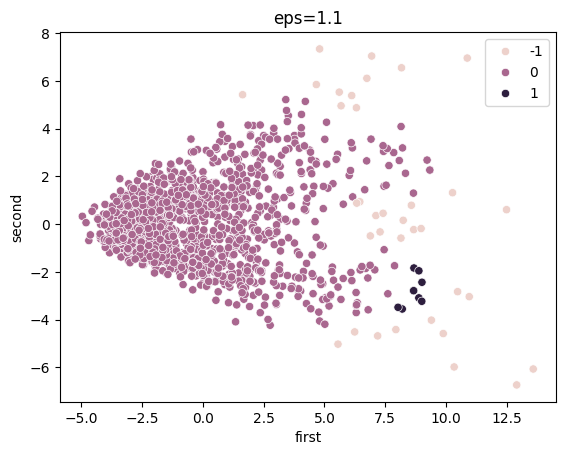

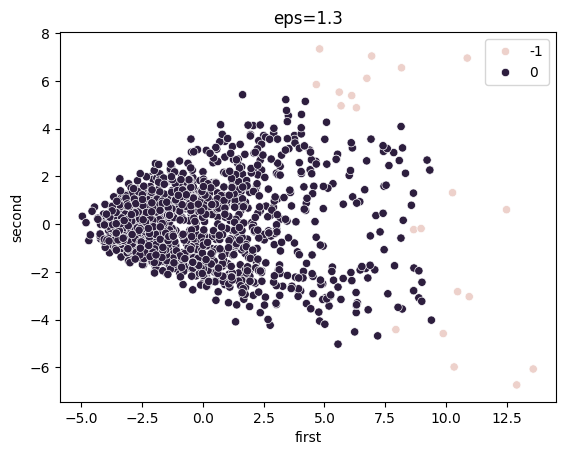

In [141]:
for eps in [x / 10 for x in range(3, 15, 2)]:
    dbscan = DBSCAN(min_samples=10, eps=eps)
    predictions = dbscan.fit_predict(X_reduced)
    
    plt.figure()
    plt.title(f'{eps=}')
    sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)

DBSCAN is considering the right tail of the dataset as outliers as this part of the data is sparser. In my opinion these outliers are the basketball players that we want to find. DBSCAN with eps = 0.7 and min_samples=10 looks the best, but only if we interpret the outliers as a class on their own.

#### HDBSCAN

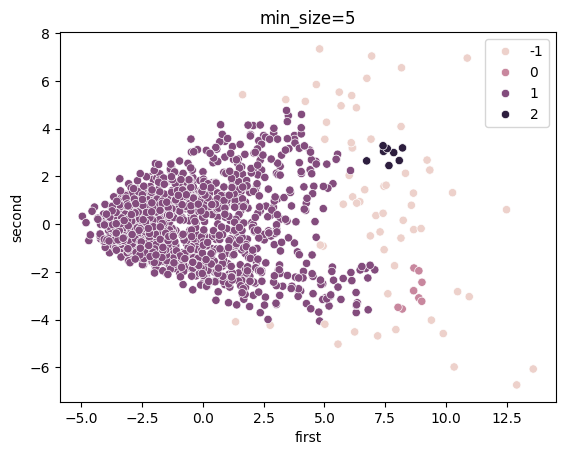

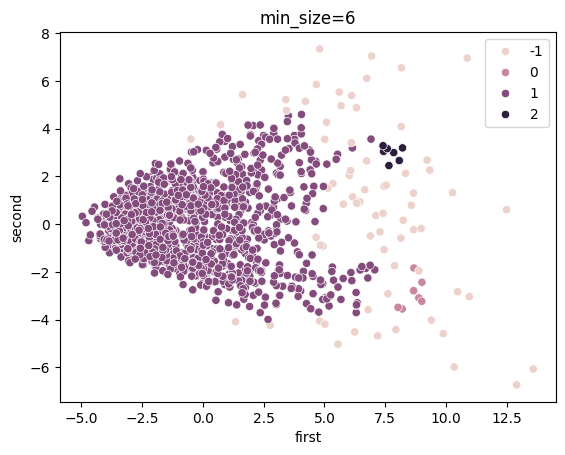

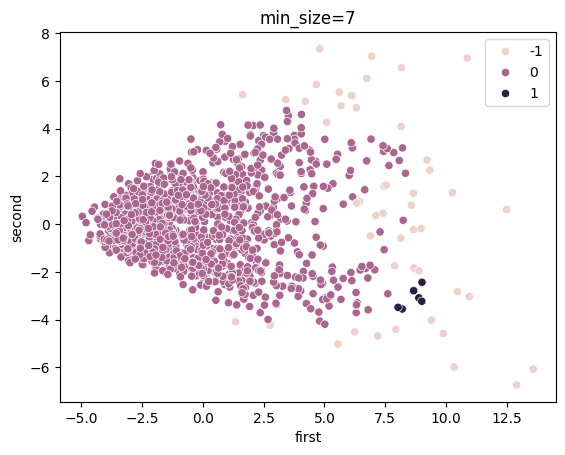

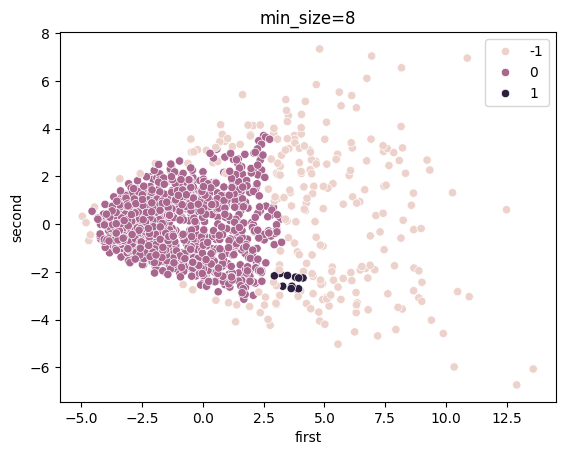

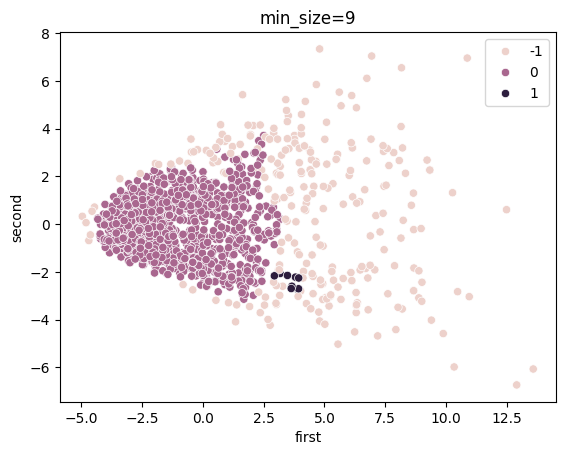

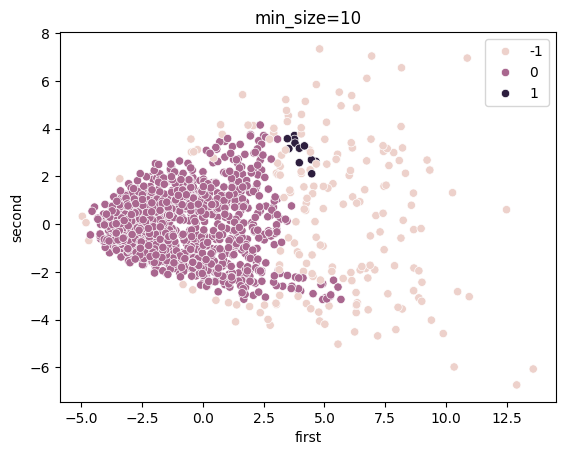

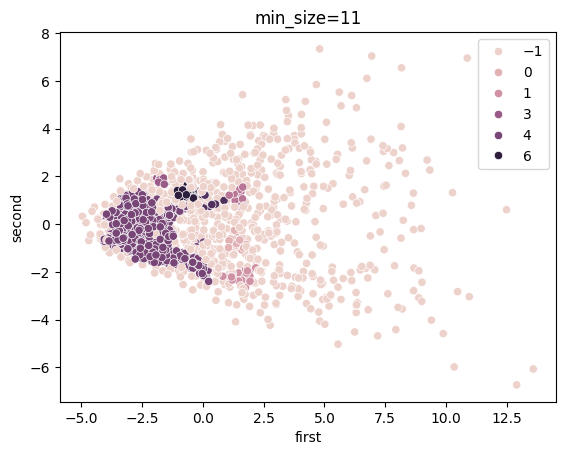

In [149]:
for min_size in range(5, 12):
    hdbscan = HDBSCAN(min_cluster_size=min_size)
    predictions = hdbscan.fit_predict(X_reduced)
    
    plt.figure()
    plt.title(f'{min_size=}')
    sns.scatterplot(data=X_reduced, x='first', y='second', hue=predictions)    

I can't decide which value is best to use. Something between 5 and 8 looks good.

#### Conclusion
At first I checked for missing values and there were almost none - still I handled accordingly the small exception. After that I made analysis of the distribution of the data and checked for outliers, everything seemed fine and the data looked good. I checked for correlations between the features and found some, made plots to illustrate them, performed PCA and reduced the data to two dimensions with explained variance sum of 0.76, which is less than ideal, but still acceptable. In the end I used 4 different models to see which is going to find the best two clusters (or more). 
This problem is kinda a regression problem as every player is playing for some positive real number of years and maybe a straight line is deviding those that play for less than 5 years or not. On the other hand DBSCAN and HDBSCAN are good at clustering non-linear clusters, that are well defined, which is the opposite of our dataset, this is probably why those two algorithms didn't perform really well (or I am just really bad at find tuning them and finding the best hyperparameters).
In the end kNN and Aglomerative clustering algorithms performed the best in my opinion, they separated the data really well for 2 and 3 clusters. Aglomerative clustering found a line in the data at which the data points starts to get sparser. If players that  play for more than 5 years are rear, it is possible that we have less data about them and this is just the line that devides them? I can't be sure, but my bet is that aglomerative clustering performed better than kNN.